In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [26]:
data_frame = pd.read_csv('data/wdbc.data').astype('category')
data_frame.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


# Description of dataset:
This dataset is used to identify whether a patient has breast cancer. It includes features derived from digitized images of fine needle aspirates (FNA) of breast masses. the features will describe the different characteristics that the breast mass has, for exampel radius, smoothness and compactness. The target in this dataset is the final diagnosis, if the patiens actually had breast cancer or not. These models will find the correlations between the features(info about the breastmass) and the target(cancer diagnosis)

# preprocessing of data
the only comlumn that needed to be removed was the ID, because this will not give us any information about the diagnosis. The rest of the columns give information about the breast mass, and therefore are needed to get the best diagnosis

I converted all the columns to numerical types because the hist function did not recognize the values as numerical. Initially, the columns were interpreted as strings (or categorical), which prevented proper plotting of histograms

In [27]:
data_frame = data_frame.drop('842302', axis=1)
data_frame['M'] = data_frame['M'].map({'M': 0, 'B': 1})
data_frame = data_frame.apply(pd.to_numeric, errors='coerce')
data_frame.head()



,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


array([[<Axes: title={'center': 'M'}>, <Axes: title={'center': '17.99'}>,
        <Axes: title={'center': '10.38'}>,
        <Axes: title={'center': '122.8'}>,
        <Axes: title={'center': '1001'}>,
        <Axes: title={'center': '0.1184'}>],
       [<Axes: title={'center': '0.2776'}>,
        <Axes: title={'center': '0.3001'}>,
        <Axes: title={'center': '0.1471'}>,
        <Axes: title={'center': '0.2419'}>,
        <Axes: title={'center': '0.07871'}>,
        <Axes: title={'center': '1.095'}>],
       [<Axes: title={'center': '0.9053'}>,
        <Axes: title={'center': '8.589'}>,
        <Axes: title={'center': '153.4'}>,
        <Axes: title={'center': '0.006399'}>,
        <Axes: title={'center': '0.04904'}>,
        <Axes: title={'center': '0.05373'}>],
       [<Axes: title={'center': '0.01587'}>,
        <Axes: title={'center': '0.03003'}>,
        <Axes: title={'center': '0.006193'}>,
        <Axes: title={'center': '25.38'}>,
        <Axes: title={'center': '17.33'}>,

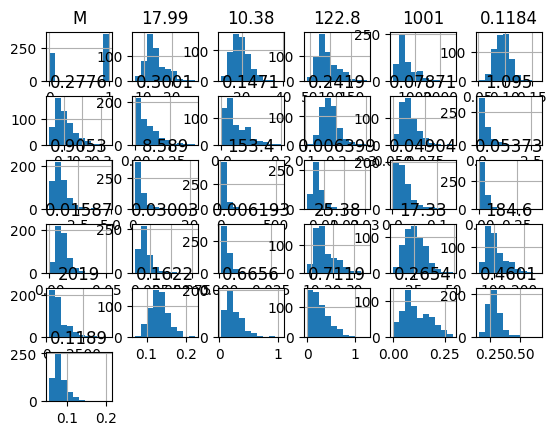

In [28]:
data_frame.hist()

When choosing the appropriate type of Naive Bayes to use, it's essential to examine the data. The histograms reveal that almost all features are normally distributed, except for one binary feature (M). Given this distribution, Gaussian Naive Bayes is the most suitable choice for this dataset. The features are not perfectly normally distributed, but it still is close enough.

# splitting the data
i split the data into three sections: training data(60%), validation(20%) data and test data(20%).
The training data should be the biggest section, so that there is enough data to make a good model. validation data is used to evaluate the model during the training process. It should be a reasonable size to provide reliable feedback on the model’s performance and ensure that we are making progress in the right direction. i choose 20% for validation, so that we also have enough data to test the final model

When splitting the data, I set a random_state to ensure that the partitioning between training and test data remains consistent across runs. This way, every time I run the program, the data split will be the same, preventing it from being randomized again. This makes hyperparameter tuning more reliable, because i know that the differences in the models performance are from the tuning.

In [29]:
features = data_frame.drop('M', axis=1)
targets = data_frame['M']


train_val_features, test_features, train_val_targets, test_targets = train_test_split(features, targets, test_size=0.2, random_state=42)

train_features, validation_features, train_targets, validation_targets = train_test_split(train_val_features, train_val_targets, test_size=0.25, random_state=42)

# making the model and hyperparameter tuning
things to consider when hyperparameter tuning a good model for this classification problem:  
most important:  
not overfitted:  
It is important to have a model that is not overfitted, meaning the performance on the training data should not be significantly better than on the validation data/test data. A model that performs well on training data but poorly in practice is not useful.
  
good recall:  
when making a model that is going to diagnose breast cancer, it is important to have good recall. It is important to identify all positive cases, so that no one with cancer gets untreated.  
  
also important:  
good precision: makes sure that all of the positive cases, were positive. it makes sure that least amount of people get wrongly diagnosed  
good F1: the model has good precision and recall  
good accuracy: the model has good overall preidicions


In [30]:
Decision_tree = DecisionTreeClassifier(random_state=42, max_depth=2, min_samples_leaf=7)
Decision_tree.fit(train_features, train_targets)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=7, random_state=42)

In [31]:
guassian_bayes = GaussianNB(var_smoothing=1e-12)
guassian_bayes.fit(train_features, train_targets)

GaussianNB(var_smoothing=1e-12)

In [32]:
score_decision = Decision_tree.score(validation_features, validation_targets)
score_naive = guassian_bayes.score(validation_features, validation_targets)
print(f"The score of the decision tree: {score_decision}, the score of naive bayes: {score_naive}")

The score of the decision tree: 0.9298245614035088, the score of naive bayes: 0.9649122807017544


In [33]:
def evaluate(model):
    train_predictions = model.predict(train_features)
    validation_predictions = model.predict(validation_features)

    print(f'Training Accuracy: {accuracy_score(train_targets, train_predictions)}')
    print(f'Training Precision: {precision_score(train_targets, train_predictions)}')
    print(f'Training recall: {recall_score(train_targets, train_predictions)}')
    print(f'Training F1: {f1_score(train_targets, train_predictions)}')
    print()
    print(f'Validation Accuracy: {accuracy_score(validation_targets, validation_predictions)}')
    print(f'Validation Precision: {precision_score(validation_targets, validation_predictions)}')
    print(f'Validation recall: {recall_score(validation_targets, validation_predictions)}')
    print(f'Validation F1: {f1_score(validation_targets, validation_predictions)}')
    print()

def test(model):
    test_predictions = model.predict(test_features)
    print(f'Test Accuracy: {accuracy_score(test_targets, test_predictions)}')
    print(f'Test Precision: {precision_score(test_targets, test_predictions)}')
    print(f'Test recall: {recall_score(test_targets, test_predictions)}')
    print(f'Test F1: {f1_score(test_targets, test_predictions)}')
    print()
    



In [34]:
print("-deicision tree evalutation: ")
evaluate(Decision_tree)
print()
print("-Naive bayes evaluation:")
evaluate(guassian_bayes)


-deicision tree evalutation: 
Training Accuracy: 0.961764705882353
Training Precision: 0.9638009049773756
Training recall: 0.9770642201834863
Training F1: 0.9703872437357631

Validation Accuracy: 0.9298245614035088
Validation Precision: 0.9436619718309859
Validation recall: 0.9436619718309859
Validation F1: 0.9436619718309859


-Naive bayes evaluation:
Training Accuracy: 0.9323529411764706
Training Precision: 0.9372197309417041
Training recall: 0.9587155963302753
Training F1: 0.9478458049886621

Validation Accuracy: 0.9649122807017544
Validation Precision: 0.971830985915493
Validation recall: 0.971830985915493
Validation F1: 0.971830985915493



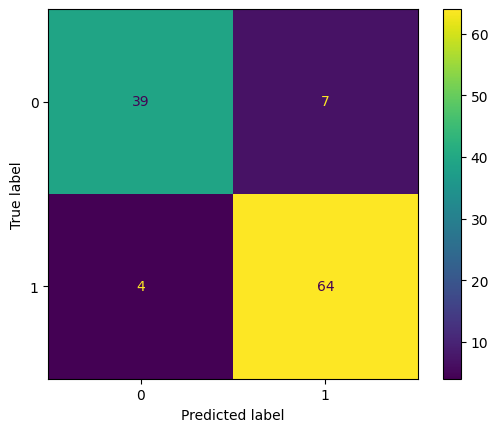

In [35]:
ConfusionMatrixDisplay.from_estimator(Decision_tree, test_features, test_targets)

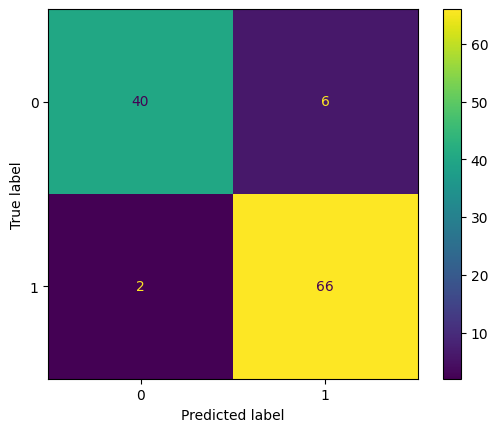

In [36]:
ConfusionMatrixDisplay.from_estimator(guassian_bayes, test_features, test_targets)

# Hyperparameter tuning
the parameters i used:  
Decision tree:  
max_depth: making the max depth lower, you can get a model that is less overfitted. the reason is that the deeper the tree is the more complex it gets and the more adapted to the training data it is.
  
min_sample_leafe: this also helps with overfitting, by making the threshold for minimal sampling of leaf bigger. 
  
i had to find a balance between making a model that is not too overfitted, but still has enough recall and enough complexity to give a good validation/test data result. 




Naive Bayes:  
This model dosen't have that many parameters to tune  
var_smoothing: this helps prevent issues with variances in the data. this will help with overfitting


# evaluating the model
the decision tree was a bit overfitted, which was hard to fix without getting lower validation and test results. the validation and test results are still very good, and have a high recall which was an important factor. 
the guassian bayes has good results without being overfitted, and has good recall.
  
   
We can see that the Gaussian bayes model is better then the decision tree. the reason is that it performs better in all aspects for validation and test data. for training data it is bit lower, but that is because the decision tree is a bit overfitted. this is also clear when we look at the confusion matrix display: the decision tree had 7 negatives that it predicted positive, and 4 positives it predicted negative. The guassian bayes model had 6 negatives which it predicted positive, and 2 positives it predicted negative. The naive bayes gave a bit better results.

In [37]:
test(Decision_tree)
test(guassian_bayes)

Test Accuracy: 0.9035087719298246
Test Precision: 0.9014084507042254
Test recall: 0.9411764705882353
Test F1: 0.920863309352518

Test Accuracy: 0.9298245614035088
Test Precision: 0.9166666666666666
Test recall: 0.9705882352941176
Test F1: 0.9428571428571428

